## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
from tensorflow import keras

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-2
EPOCHS = 15
BATCH_SIZE = 256
MOMENTUM = 0.95
DRP_RATIO = [0.2, 0.4, 0.6, 0.8]
NEURON_UNITS = [512, 256, 128, 32]

In [8]:
results = {}

for drp_rate in DRP_RATIO:
    keras.backend.clear_session()
    
    model = build_mlp(x_train.shape[1:], 10, NEURON_UNITS, drp_rate)
    loss = keras.losses.CategoricalCrossentropy()
    optimizer = keras.optimizers.Adam()
    model.compile(loss=loss, metrics=['accuracy'], optimizer=optimizer)
    history = model.fit(x_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data=(x_test, y_test),
                        shuffle=True)
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    exp_name_tag = 'exp-Dropout-' + str(drp_rate)
    results[exp_name_tag] = {'train-loss':  train_loss,
                             'val-loss': val_loss,
                             'train-acc': train_acc,
                             'val-acc': val_acc}
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 2s 36us/sample - loss: 2.1241 - accuracy: 0.2048 - val_loss: 1.8952 - val_accuracy: 0.3103
Epoch 2/15
50000/50000 [==============================] - 1s 28us/sample - loss: 1.9230 - accuracy: 0.2971 - val_loss: 1.7924 - val_accuracy: 0.3632
Epoch 3/15
50000/50000 [==============================] - 1s 27us/sample - loss: 1.8558 - accuracy: 0.3288 - val_loss: 1.7338 - val_accuracy: 0.3752
Epoch 4/15
50000/50000 [==============================] - 1s 24us/sample - loss: 1.8053 - accuracy: 0.3442 - val_loss: 1.7165 - val_accuracy: 0.3774
Epoch 5/15
50000/50000 [==============================] - 1s 24us/sample - loss: 1.7819 - accuracy: 0.3589 - val_loss: 1.6632 - val_accuracy: 0.4041
Epoch 6/15
50000/50000 [==============================] - 1s 27us/sample - loss: 1.7445 - accuracy: 0.3727 - val_loss: 1.6720 - val_accuracy: 0.4187
Epoch 7/15
50000/50000 [==============================] 

50000/50000 [==============================] - 2s 38us/sample - loss: 2.3035 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
50000/50000 [==============================] - 2s 46us/sample - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
50000/50000 [==============================] - 2s 48us/sample - loss: 2.3028 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
50000/50000 [==============================] - 2s 48us/sample - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/15
50000/50000 [==============================] - 2s 40us/sample - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/15
50000/50000 [==============================] - 2s 38us/sample - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 10/15
50000/50000 [==============================] - 2s 42us/sample - loss: 2.3027 - accuracy: 0.1000 - val_los

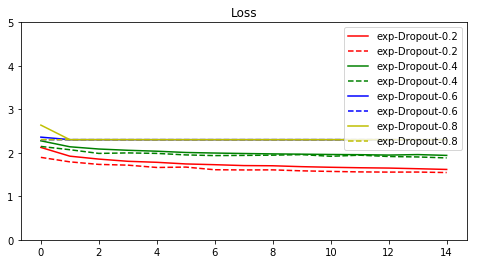

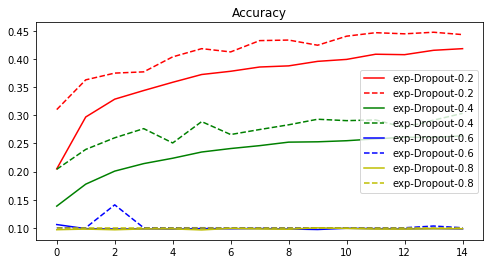

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])),results[cond]['val-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-acc'])),results[cond]['val-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()